### ２次元の混合ガウス分布

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math

In [16]:
class Gauss_Model():
    def __init__(self):
        self.k = 2
        self.pai = [1/2,1/2]
        self.sample = []
        self.gauss = []
        self.ganma = []
        self.clus = ['r','b','y']
        self.first = 0
        
    def dataset(self,mean,sigma):
        for i in range(self.k):
            samplesB = np.random.multivariate_normal(mean[i],sigma[i],300).T
            if(i>=1):
                samplesA = np.column_stack((samplesA,samplesB))
            else:
                samplesA = samplesB
        self.sample = samplesA
        plt.scatter(self.sample[0],self.sample[1],color='g',marker='+',alpha=0.5)
        
    def make_gauss_model(self,ave,sigma):
        self.gauss = []
        for i in range(self.k):
            self.gauss.append(multivariate_normal(mean=ave[i],cov=sigma[i]))
    
    def plot_graph(self,gauss,ganma):
        plt.figure()
        x,y = np.meshgrid(np.linspace(min(self.sample[0]),max(self.sample[0]),1000),np.linspace(min(self.sample[1]),max(self.sample[1]),1000))
        pos = np.dstack((x,y))
        for i in range(self.k):
            z = gauss[i].pdf(pos)
            plt.contour(x, y, z,colors=self.clus[i],alpha=0.5)
        if self.first == 0:
            plt.scatter(self.sample[0],self.sample[1],color="g",marker='+')
        else:
            for i in range(len(self.sample[0])):
                plt.scatter(self.sample[0][i],self.sample[1][i],color=[ganma[i][0],0.0,ganma[i][1]],marker='+',alpha=0.5)
        self.first = 1
    
    def e_step(self,pai,gauss):
        self.ganma = []
        for i in range(len(self.sample[0])):
            sum_p = 0.0
            p=[]
            for j in range(self.k):
                sum_p += pai[j]*gauss[j].pdf([self.sample[0][i],self.sample[1][i]])
            for j in range(self.k):
                p.append(pai[j]*gauss[j].pdf([self.sample[0][i],self.sample[1][i]])/sum_p)
            self.ganma.append(p)
            
    def m_step(self,ganma):
        N = []
        self.g_mean = []
        self.g_sigma = []
        self.pai = []
        for i in range(self.k):
            sum_p = 0.0
            for j in range(len(self.sample[0])):
                sum_p += ganma[j][i]
            N.append(sum_p)
            
            #分布の中心の更新
            sum_x = 0.0
            sum_y = 0.0
            for j in range(len(self.sample[0])):
                sum_x += ganma[j][i]*self.sample[0][j]
                sum_y += ganma[j][i]*self.sample[1][j]
            self.g_mean.append([sum_x/N[i],sum_y/N[i]])
            
            #分布の共分散行列の更新
            sum_p = 0.0
            sigma = []
            sigma = [np.array([self.sample[0][j],self.sample[1][j]])-np.array([self.g_mean[i]]) for j in range(len(self.sample[0]))]
            
            self.g_sigma.append(sum([ganma[j][i]*sigma[j].T.dot(sigma[j])for j in range(len(self.sample[0]))])/N[i])
            self.pai.append(N[i]/len(self.sample[0]))

C:\Users\uroko\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


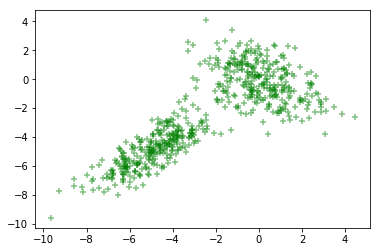

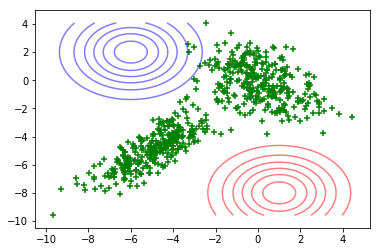

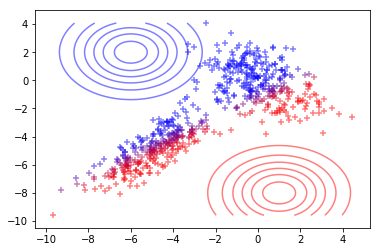

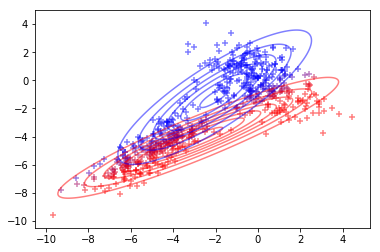

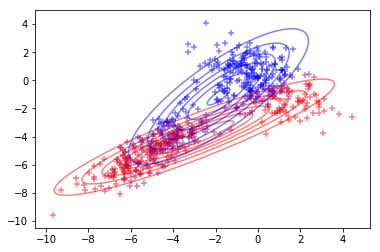

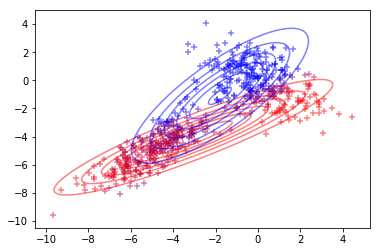

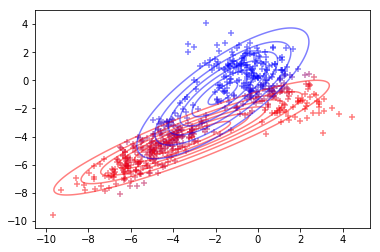

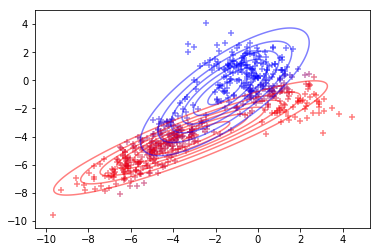

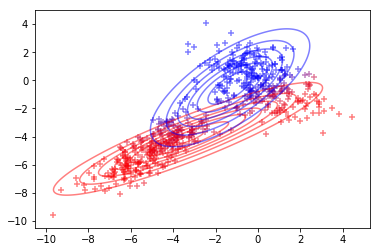

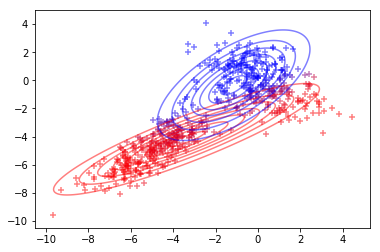

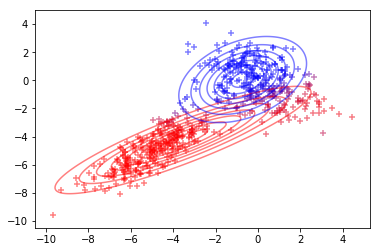

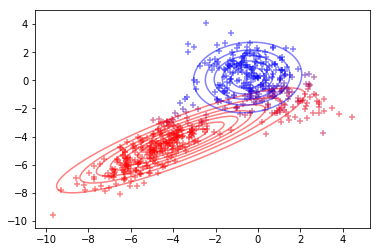

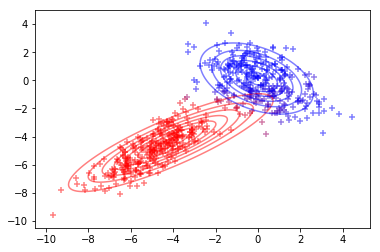

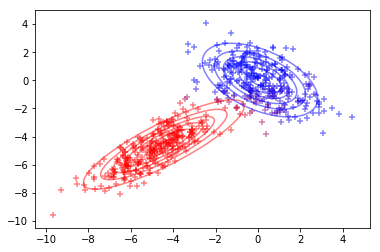

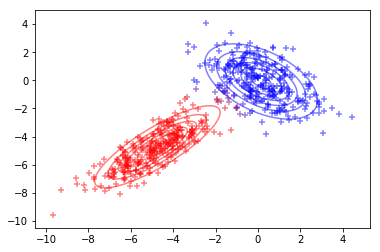

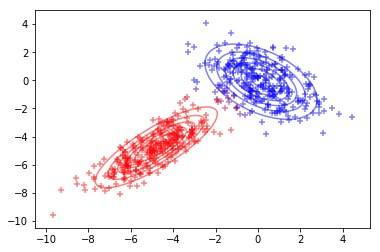

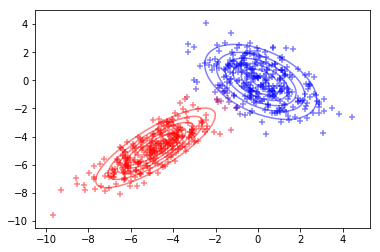

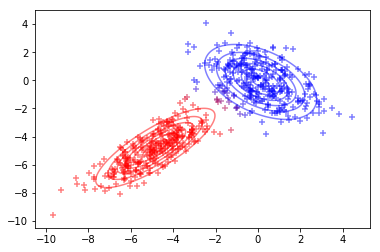

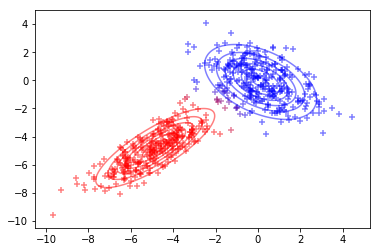

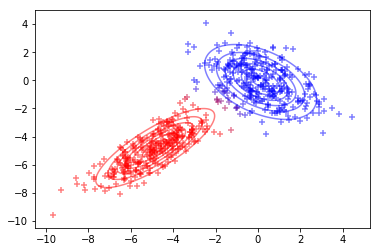

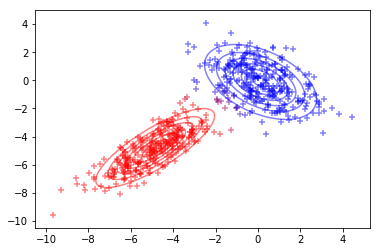

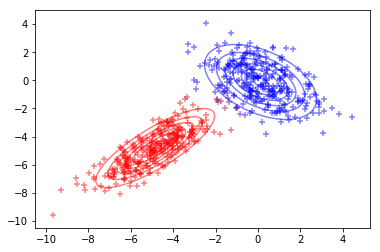

In [17]:
gm = Gauss_Model()
s_mean = [[-5,-5],[0,0],[5,5]]
s_sigma = [[[1.9,1.5],[1.5,1.9]],
        [[2.1,-1.0],[-1.0,2.1]],
          [[1.9,1.5],[1.5,1.9]]]
gm.dataset(s_mean,s_sigma)

g_mean = [[1,-8],[-6,2],[0,0]]
g_sigma = [[[3,0],[0,3]],
        [[3,0],[0,3]],
          [[1,0],[0,1]]]
gm.make_gauss_model(g_mean,g_sigma)
gm.plot_graph(gm.gauss,gm.ganma)

for i in range(30):
    gm.e_step(gm.pai,gm.gauss)
    if i % 3 == 0:
        gm.plot_graph(gm.gauss,gm.ganma)
    
    gm.m_step(gm.ganma)
    gm.make_gauss_model(gm.g_mean,gm.g_sigma)
    if i % 3 == 0:
        gm.plot_graph(gm.gauss,gm.ganma)